<a href="https://colab.research.google.com/github/galiya19/Airplane-seat-problem/blob/main/cs114_problem_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

trials = 10000

#how many times twentieth passenger ends up in assigned seat #20
count_passenger20_in_seat20 = 0

for _ in range(trials):
    # occupant[i] = passenger number occupying seat i+1; 0 means seat is free
    occupant = [0] * 20

    # 1) Passenger 1st picks a seat from {2..20}
    first_seat = np.random.choice(range(2, 21))  # picks an integer in [2..20]
    occupant[first_seat - 1] = 1  # seat index = seat# - 1

    # 2) Passengers 2nd - 20th board
    for p in range(2, 21):
        if occupant[p - 1] == 0:
            # Their own seat is free
            occupant[p - 1] = p
        else:
            # Need to pick a free seat at random
            free_seats = [i for i, who in enumerate(occupant) if who == 0]
            chosen_seat_index = np.random.choice(free_seats)
            occupant[chosen_seat_index] = p

    # 3) Check if seat #20 (occupant index 19) is occupied by passenger #20
    if occupant[19] == 20:
        count_passenger20_in_seat20 += 1

simulated_probability = count_passenger20_in_seat20 / trials

theoretical_probability = 9 / 19

print('Simulated probability:', simulated_probability)
print('Theoretical probability:', theoretical_probability)

Simulated probability: 0.4812
Theoretical probability: 0.47368421052631576


In [ ]:
import numpy as np

trials = 10000

#how many times twentieth passenger ends up in seat #20
count_passenger20_in_seat20 = 0

for _ in range(trials):
    # occupant[i] = passenger occupying seat (i+1); 0 => free seat
    occupant = [0] * 25

    # 1) Passenger 1st picks a seat from {2..25}
    first_seat = np.random.choice(range(2, 26))  # picks an integer in [2..25]
    occupant[first_seat - 1] = 1  # occupant index = seat# - 1

    # 2) Passengers 2nd - 20th board
    for p in range(2, 21):
        if occupant[p - 1] == 0:
            # Their own seat (p) is free => passenger p sits in seat p
            occupant[p - 1] = p
        else:
            # Seat p is taken => passenger p picks a random free seat
            free_seats = [i for i, who in enumerate(occupant) if who == 0]
            chosen_seat_index = np.random.choice(free_seats)
            occupant[chosen_seat_index] = p

    # 3) Check if seat #20 (occupant index 19) is occupied by passenger #20
    if occupant[19] == 20:
        count_passenger20_in_seat20 += 1

simulated_probability = count_passenger20_in_seat20 / trials

theoretical_probability = 143 / 168

print('Simulated probability:', simulated_probability)
print('Theoretical probability:', theoretical_probability)


Simulated probability: 0.8494
Theoretical probability: 0.8511904761904762


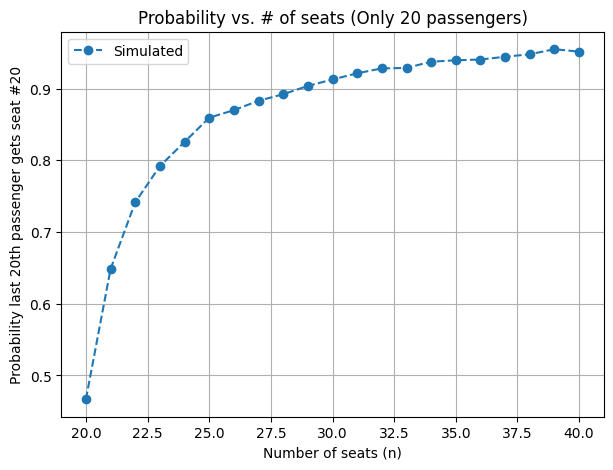

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_for_n_seats(n, trials=10000):
    """
    Simulating a scenario with n seats (n >= 20) and 20 passengers.
    """
    count_last_in_correct_seat = 0

    for _ in range(trials):
        # occupant[i] = passenger number in seat i+1; 0 => seat is free
        occupant = [0]*n

        # Passenger #1 picks from seats 2..n
        first_seat = np.random.randint(2, n+1)
        occupant[first_seat - 1] = 1  # seat index = seat# - 1

        # Next passengers 2..20
        for p in range(2, 21):
            if occupant[p - 1] == 0:
                occupant[p - 1] = p
            else:
                free_seats = [i for i, who in enumerate(occupant) if who == 0]
                chosen_index = np.random.choice(free_seats)
                occupant[chosen_index] = p

        # Check if seat #20 (index 19) has passenger 20
        if occupant[19] == 20:
            count_last_in_correct_seat += 1

    return count_last_in_correct_seat / trials


def main():
    # Range of seat counts from 20 to 40
    seat_counts = range(20, 41)
    trials = 10000

    sim_probs = []
    theory_probs = []

    for n in seat_counts:
        sim_p = simulate_for_n_seats(n, trials=trials)
        sim_probs.append(sim_p)

    plt.figure(figsize=(7,5))
    plt.plot(list(seat_counts), sim_probs, 'o--', label='Simulated')
    plt.xlabel('Number of seats (n)')
    plt.ylabel('Probability last 20th passenger gets seat #20')
    plt.title('Probability vs. # of seats (Only 20 passengers)')
    plt.grid(True)
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()


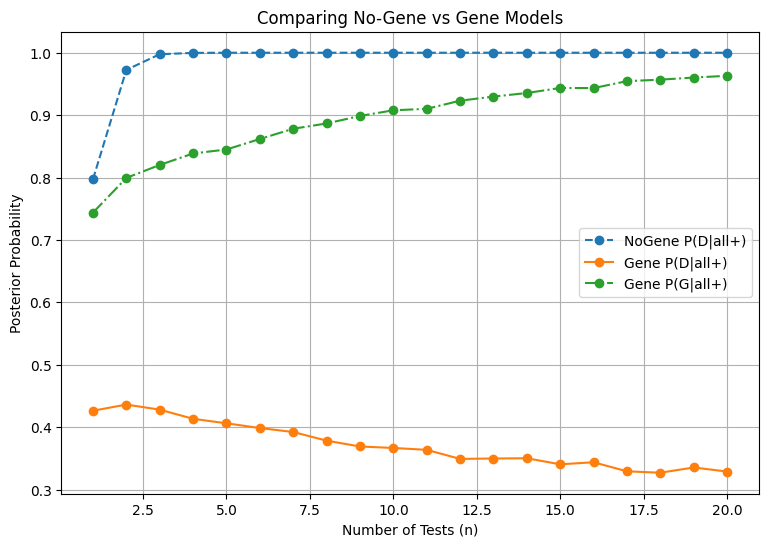

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_no_gene(n, p, a0, b0, trials=10000):
    """
    Simulating the 'no-gene' scenario:
      - Omer has disease D with probability p
      - Each test is + with prob a0 if D, else b0
    """
    count_allplus = 0
    count_D_and_allplus = 0

    for _ in range(trials):
        D = (np.random.rand() < p)

        # generate n Bernoulli tests
        if D:
            tests = (np.random.rand(n) < a0)
        else:
            tests = (np.random.rand(n) < b0)

        allplus = np.all(tests)
        if allplus:
            count_allplus += 1
            if D:
                count_D_and_allplus += 1

    if count_allplus == 0:
        return 0.0
    return count_D_and_allplus / count_allplus

def simulate_gene(n, p, a1, b1, trials=10000):
    """
    Simulate the 'gene' scenario:
      - G with prob 0.5; if G => all tests + always
      - else no gene => each test + with prob a1 if D, or b1 if not D
    Returns (est_P_D, est_P_G):
      - est_P_D = P(D|all+), fraction of all+ occurrences that come from actual disease
      - est_P_G = P(G|all+), fraction of all+ occurrences that come from actual gene
    """
    count_allplus = 0
    count_D_and_allplus = 0
    count_G_and_allplus = 0

    for _ in range(trials):
        G = (np.random.rand() < 0.5)
        D = (np.random.rand() < p)

        if G:
            allplus = True  # always all +
        else:
            # no gene => depends on D or not
            if D:
                tests = (np.random.rand(n) < a1)
            else:
                tests = (np.random.rand(n) < b1)
            allplus = np.all(tests)

        if allplus:
            count_allplus += 1
            if D:
                count_D_and_allplus += 1
            if G:
                count_G_and_allplus += 1

    if count_allplus == 0:
        return (0.0, 0.0)
    est_pD = count_D_and_allplus / count_allplus
    est_pG = count_G_and_allplus / count_allplus
    return (est_pD, est_pG)

def main():
    # --------- PARAMETERS ---------------
    # No-gene scenario:
    p  = 0.3
    a0 = 0.9
    b0 = 0.1

    # Gene scenario uses p but has a1,b1:
    a1 = 0.9
    b1 = 0.1

    max_n = 20
    trials = 20000

    # Arrays to store results
    sim_no_gene = []   # sim of P(D|all+) no-gene
    sim_gene_D  = []   # sim of P(D|all+) gene
    sim_gene_G  = []   # sim of P(G|all+) gene

    n_values = range(1, max_n+1)

    for n in n_values:
        # 1) Simulate no-gene scenario
        sim_pD_ng = simulate_no_gene(n, p, a0, b0, trials)
        sim_no_gene.append(sim_pD_ng)

        # 2) Simulate gene scenario
        sim_pD_g, sim_pG_g = simulate_gene(n, p, a1, b1, trials)
        sim_gene_D.append(sim_pD_g)
        sim_gene_G.append(sim_pG_g)

    # ---- PLOTTING ----
    plt.figure(figsize=(9,6))

    #NO-GENE lines
    plt.plot(n_values, sim_no_gene, 'o--', label="NoGene P(D|all+)")

    #GENE lines: P(D|all+)
    plt.plot(n_values, sim_gene_D, 'o-', label="Gene P(D|all+)")

    #GENE lines: P(G|all+)
    plt.plot(n_values, sim_gene_G, 'o-.', label="Gene P(G|all+)")

    plt.xlabel("Number of Tests (n)")
    plt.ylabel("Posterior Probability")
    plt.title("Comparing No-Gene vs Gene Models")
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__=="__main__":
    main()
